# Outline of Lab:

### 1. Introduction: Transition from Sankey
 - "You've now *visualized* the water transmission between and analyzed acquired an intuition as to why you saw the change that you saw. Now you'll look at this data in barplots alongside with energy transmission data and analyze the ratio of energy consumption to the volume of transported water..."

### 2. Introduce data
- <div style = "color: orange">**NOTE:** I made a new csv so students don't have to worrya bout 2010 and 2015 data being separate, combining them together, and then filtering out uncessary water targets and years. The new csv is called `network.csv`</div>
- Take a moment to explain the data. What do the columns mean? Do we need any more columns? What does "source" and "target" mean? What to the "year" columns mean?
    - create the new "Total Energy" column here!
- *Note*: Intro notebook MUST cover `.where()` and `.group()` functions thoroughly.

### 3. Analysis Example!
- Conduct example analysis on Cerrito utility. Make sure to **explain** what you're doing and why: what will the students take away from this analysis? Ask discussion questions to make sure students are following, and **provide your own interpretation**.
- As a part of the analysis, plot a bargraph with 2010, predicted 2015 and actual 2015 data.
- *Note:* Make sure to interpret the graph at some point. Students will be looking to see an example of how you analyze the graph to do it themselves.
- Finally, compare and **discuss** the total energy to cumulative water volume ratio between 2010, predicted 2015

### 4. Students try their own utility!
- provide some skeleton code, have students produce the same bar graphs & look at energy to water ratio, write down their interpretation, answer discussion questions.

### 5. Big Picture: what did this look like overall across California?
- Use all utilities to conduct the same analysis
- discuss effect of drought, ratio
- Discussion questions, ask if students' utilities experiences the same trend.

### 6. Conclusion:
- Peer consulting (resource)
- Survey

In [1]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Now you have visualized the utility network as well as water flor from immediate sources, we will analyze differences between years in energy consumption. We will be looking at the actual 2010 data, actual 2015 data, and the 2015 data predicted in 2010.

# Making class data

@Mina: you don't need to run this section. I just wanted to leave this here in case you were wondering how I made the class data or I need to revisit this at some point down the line.

In [73]:
data2010 = pd.read_csv('network2010.csv')
data2015 = pd.read_csv('network2015.csv')
data = data2010.append(data2015)

We're only interested in water **utilities** as targets, so we want to filter the data to only include water utilities in the target column. We can make a list of unique utilities by the following code.

In [81]:
utilities = [utility for utility in data2010['target'].unique() if "E" == utility[-1]]

In [82]:
util_data = data[data['target'].isin(utilities)]
util_data = util_data[util_data['year'].isin([2010, 2015])]

In [96]:
predicted = util_data[(util_data['data_year'] == 2010) & (util_data['year'] == 2015)]
actual_data = util_data[(util_data['data_year'] == 2015) | (util_data['year'] == 2010)]
predicted['year'] = np.repeat("Predicted 2015", len(predicted))
actual_data['year'] = actual_data['year'].apply(str)

C:\Users\keiko\Anaconda3\envs\discovery\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [78]:
# util_data.to_csv('network.csv', index = False)

---

# ***Big Picture: Using datascience package

In [119]:
test = test.with_column('Total Energy', test.column('cumulative_volume_af')*test.column("transmission_kwh/af"))
test_group = test.group('year', sum)
test_group

year,data_year sum,source sum,target sum,cumulative_volume_af sum,transmission_kwh/af sum,treatment_kwh/af sum,used_vol_af sum,Total Energy sum
2010,1041180,,,6.64069e+06,87234.8,0,6.53952e+06,1.10632e+09
2015,745550,,,4.3739e+06,162506,0,4.3739e+06,2.70958e+09
Predicted 2015,1115550,,,8.03714e+06,94854.8,0,7.93035e+06,1.33226e+09


In [120]:
# Ratios!
test_group.column('Total Energy sum') / test_group.column('cumulative_volume_af sum')

array([166.5977634 , 619.48860525, 165.76336398])

### Analysis of the above:

In 2010, California consumed 1.10632 Billion kwh (kilowatt per hour?) of energy to transport 6.64069 Million (units) of water. The amount of water transported in 2015 was predicted at that time to increase, so the total energy consumed was also predicted to increase by a small amount. However, if you look at what actually happened in 2015, the amount of water transported actually reduced to 4.3739 Million (units) of water, but the total energy expended increased significantly to 2.70958 Billion kwh, which is much, much higher than the predicted increase in energy (which also predicted that water transports would increase).

How could this be?

etc.


---

# Functions Used In This Lab
`tablename['colume name']` : Returns a column of a table with that name.


`numpy.where(condition[, x, y])` : Return elements chosen from x or y depending on condition.


`numpy.sort(a, axis=-1, kind='quicksort', order=None)[source]` : Return a sorted copy of an array.


`numpy.append(arr, values, axis=None)[source]` : Append values to the end of an array.

## Extract 2010 data and 2015 data

### 2010 Data

In [2]:
data = Table().read_table('network2010.csv')
data

year,data_year,source,target,cumulative_volume_af,transmission_kwh/af,treatment_kwh/af,used_vol_af
2010,2010,1801001PD,1801001E,1624,163.1,0,1624
2010,2010,1801007PD,1801007E,2015.2,163.1,0,2015.2
2010,2010,1801009PD,1801017PD,561.768,25,0,557.004
2010,2010,1801009PD,1801009E,2924.55,163.1,0,2924.55
2010,2010,1801011PD,1801011E,1350,163.1,0,1350
2010,2010,1801015PD,1801017PD,616.923,25,0,611.692
2010,2010,1801015PD,1801015E,840,163.1,0,840
2010,2010,1801015PD,1801019PD,1415,25,0,1414.56
2010,2010,1801015PD,1801001PD,1460.72,87,0,1460.72
2010,2010,1801015PD,1801009PD,2949,25,0,2924.55


### 2015 Data

In [3]:
data_1 = Table().read_table('network2015.csv')
data_1

year,data_year,source,target,cumulative_volume_af,transmission_kwh/af,treatment_kwh/af,used_vol_af
2015,2015,1803005NPD,1803005E,733,17.6,0,733
2015,2015,SW1803005W,1803005NPD,733,87,236,0
2015,2015,1803005WIMP,1803005PD,962.992,0,224,0
2040,2015,SW1803005W,1803005NPD,2240,87,236,0
2025,2015,1803005NPD,1803005E,2240,17.6,0,2240
2035,2015,SW1803005W,1803005NPD,2240,87,236,0
2020,2015,1803005NPD,1803005E,2240,17.6,0,2240
2020,2015,SW1803005W,1803005NPD,2240,87,236,0
2030,2015,1803005NPD,1803005E,2240,17.6,0,2240
2030,2015,SW1803005W,1803005NPD,2240,87,236,0


# Dictionary For Sources
- NPD (Non-potable distribution): 
    Utility + "NPD" for treated non-potable water delivered to end-user


- PD (Potable distribution): 
    Utility + "PD" for treated potable water delivered to an end-user


- GW (Groundwater): 
    For water sources, “GW” + DWR basin/subbasin code, if basin is known OR “GW” + Utility Code, if not; for groundwater sold untreated to a retail utility, Utility code + “GW”


- GWR (Groundwater recharge): 
    Similar to groundwater codes described above, substituting “GWR” for “GW”


- SW (Surface water): 
    "SW" + utility code for unspecified surface water source

In this lab, we will be focusing  on 6 utilities.
- Alameda (1805003E) 
- Fresno (1803033E) 
- Hidesert (1810019E) 
- Palmdale (1809027E) 
- San Jose (1805085E)
- Santa Monice (1807341E)

## Extract data for 2010


In [4]:
#Getting data for 2010.
data_2010 = data.where(data['year'] == 2010)
data_2010

year,data_year,source,target,cumulative_volume_af,transmission_kwh/af,treatment_kwh/af,used_vol_af
2010,2010,1801001PD,1801001E,1624,163.1,0,1624
2010,2010,1801007PD,1801007E,2015.2,163.1,0,2015.2
2010,2010,1801009PD,1801017PD,561.768,25,0,557.004
2010,2010,1801009PD,1801009E,2924.55,163.1,0,2924.55
2010,2010,1801011PD,1801011E,1350,163.1,0,1350
2010,2010,1801015PD,1801017PD,616.923,25,0,611.692
2010,2010,1801015PD,1801015E,840,163.1,0,840
2010,2010,1801015PD,1801019PD,1415,25,0,1414.56
2010,2010,1801015PD,1801001PD,1460.72,87,0,1460.72
2010,2010,1801015PD,1801009PD,2949,25,0,2924.55


## Let's try extracting data for a specific utility.
### This is an example for Cerritos (1807057E).

##### Cerritos

In [5]:
cerritos = data_2010.where(data_2010['target'] == "1807057E")
cerritos

year,data_year,source,target,cumulative_volume_af,transmission_kwh/af,treatment_kwh/af,used_vol_af
2010,2010,1807057NPD,1807057E,1870,195.72,0,1870
2010,2010,1807057PD,1807057E,6048,163.1,0,6048


#### Sort by the amount of cumulative volume

In [6]:
#where do they get most water?
cerritos = cerritos.sort('cumulative_volume_af', descending = True)
cerritos

year,data_year,source,target,cumulative_volume_af,transmission_kwh/af,treatment_kwh/af,used_vol_af
2010,2010,1807057PD,1807057E,6048,163.1,0,6048
2010,2010,1807057NPD,1807057E,1870,195.72,0,1870


## Try your own!
### Choose one from the remaining five sources.

##### Utility

In [7]:
utility = ...
utility

Ellipsis

### Sort by the amount of cumulative volume.

In [8]:
#where do they get most water?
utility = utility.sort(...)
utility

AttributeError: 'ellipsis' object has no attribute 'sort'

## Extract data for 2015.

In [ ]:
#Getting data for 2015.
data_2015 = data_1.where(data_1['year'] == 2015)
data_2015

## Extracting data in 2015 for Cerritos (1807057E)

##### Cerritos

In [9]:
cerritos_2015 = data_2015.where(data_2015['target'] == "1807057E")
cerritos_2015


NameError: name 'data_2015' is not defined

## Try extracting 2015 data for your own utility!

##### Utility

In [10]:
#Data where target = Fresno 
utility_2015 = ...
utility_2015

Ellipsis

### Sort the values by cumulative volume

In [11]:
#where do they get most water?
utility_2015 = utility_2015.sort(...)
utility_2015

AttributeError: 'ellipsis' object has no attribute 'sort'

# Lets combine data from 2010 and 2015 found above!
Using the `table.append(table2)` function, we can add data in 2015 to 2010.
#### Below is an example for Cerritos Water utility.

#### Cerritos

In [215]:
cerritos_water_final = cerritos.append(cerritos_2015)
cerritos_water_final

year,data_year,source,target,cumulative_volume_af,transmission_kwh/af,treatment_kwh/af,used_vol_af
2010,2010,1807057PD,1807057E,6048,163.1,0,6048
2010,2010,1807057NPD,1807057E,1870,195.72,0,1870
2015,2015,1807057NPD,1807057E,2335,195.72,0,2335
2015,2015,1807057PD,1807057E,8460,326.2,0,8460


### Make your own appended table from your own utilities.
##### Utility

In [16]:
utility_final = ...
utility_final
#all from portable and nonportable water andincrease in cumulative volume


# Let's Observe Cerritos Water Utility 

In [216]:
cerritos_water_final

year,data_year,source,target,cumulative_volume_af,transmission_kwh/af,treatment_kwh/af,used_vol_af
2010,2010,1807057PD,1807057E,6048,163.1,0,6048
2010,2010,1807057NPD,1807057E,1870,195.72,0,1870
2015,2015,1807057NPD,1807057E,2335,195.72,0,2335
2015,2015,1807057PD,1807057E,8460,326.2,0,8460


## How to calculate the amount of energy used.
- transmission_kwh = cumulative_volume_af * transmission_kwh/af

## How to calculate the percentage increase.
- Increase = New Number - Original Number
- % Increase = Increase / Original Number * 100

#### Actual 2010 Data

In [217]:
cerritos_2010 = data_2010.where(data_2010['target'] == "1807057E")
cerritos_2010

year,data_year,source,target,cumulative_volume_af,transmission_kwh/af,treatment_kwh/af,used_vol_af
2010,2010,1807057NPD,1807057E,1870,195.72,0,1870
2010,2010,1807057PD,1807057E,6048,163.1,0,6048


#### Predicted 2015 Data

In [218]:
data_2010_pred = data.where(data['year'] == 2015)
cerritos_2015p = data_2010_pred.where(data_2010_pred['target'] == "1807057E")
cerritos_2015p


year,data_year,source,target,cumulative_volume_af,transmission_kwh/af,treatment_kwh/af,used_vol_af
2015,2010,1807057NPD,1807057E,2046,195.72,0,2046
2015,2010,1807057PD,1807057E,7410,163.1,0,7410


#### Actual 2015 Data

In [219]:
cerritos_2015 = data_2015.where(data_2015['target'] == "1807057E")
cerritos_2015

year,data_year,source,target,cumulative_volume_af,transmission_kwh/af,treatment_kwh/af,used_vol_af
2015,2015,1807057NPD,1807057E,2335,195.72,0,2335
2015,2015,1807057PD,1807057E,8460,326.2,0,8460


# Actual 2010 vs Predicted 2015


### Amount of energy used in 2010 vs 2015 projection

#### What is the total amount of energy used in 2010?

In [220]:
actual_energy_2010 = 1870 * 195.72 + 7410 * 163.1
print ("Amount of Energy used in 2010 : " + str(actual_energy_2010) + " kwh")

Amount of Energy used in 2010 : 1574567.4 kwh


#### What is the total amount of energy predicted to be used in 2015?

In [221]:
projection_energy_2015 = 2046 * 195.72 + 15817 * 163.1
print ("Amount of Energy used in 2015 projection : " + str(projection_energy_2015) + " kwh")

Amount of Energy used in 2015 projection : 2980195.82 kwh


#### What is the predicted percent increase of energy used between 2010 and 2015?

In [222]:
diff_2010 = projection_energy_2015 - actual_energy_2010
percent = diff_2010 / actual_energy_2010
print ("Transmission energy is expected to increase by " + str(percent) + "%")

Transmission energy is expected to increase by 0.8927076859332919%


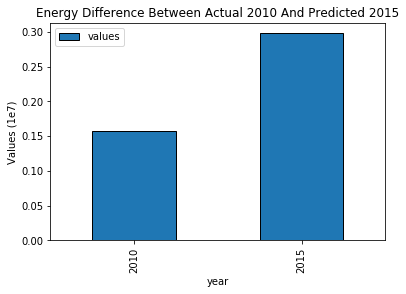

In [247]:
data = pd.DataFrame(data = 
                      {"year" : [2010, 2015], 
                       "values" : [actual_energy_2010/(10**7), projection_energy_2015/(10**7)]})                                          
data.plot(kind='bar',x='year', y='values');
plt.title("Energy Difference Between Actual 2010 And Predicted 2015");
plt.ylabel('Values (1e7)');




### Cumulative volume change 2010 vs 2015 projection

#### What is the total amount of water transported in 2010?

In [224]:
volume_2010 = 1870 + 7410
print ("Amount of volume used in 2010 : " + str(volume_2010))

Amount of volume used in 2010 : 9280


#### What is the total amount of water predicted to be transported in 2015?

In [225]:
volume_2015p = 2046 + 15817
print ("Amount of volume used in 2015 : " + str(volume_2015))

Amount of volume used in 2015 : 10795


#### What is the predicted percent increase of cumulative volume of water transported between 2010 and 2015?

In [226]:
percent_v = (volume_2015p - volume_2010) / volume_2010
print ("Volume of water expected to change by " + str(percent_v) + "% from 2010 and 2015")

Volume of water expected to change by 0.9248922413793104% from 2010 and 2015


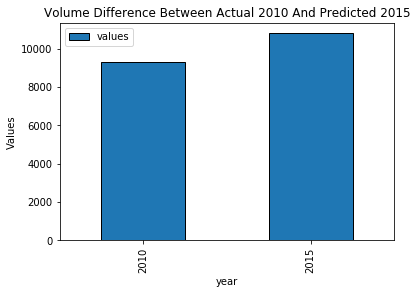

In [227]:
data_1 = pd.DataFrame(data = 
                     {"year" : [2010, 2015], 
                       "values" : [volume_2010, volume_2015]})
data_1.plot(kind='bar',x='year', y='values')
plt.title("Volume Difference Between Actual 2010 And Predicted 2015")
plt.ylabel('Values');


# Actual 2010 vs Actual 2015

### Amount of energy used in 2010 vs 2015 


#### What is the total amount of energy used in 2010?

In [228]:
print ("The total transmission_kwh in 2010 : " + str(actual_energy_2010) + " kwh")

The total transmission_kwh in 2010 : 1574567.4 kwh


#### What is the total amount of energy used in 2015?

In [229]:
actual_energy_2015 = 2335 * 195.72 + 8460 * 326.2
print ("The total transmission_kwh in 2015 : " + str(actual_energy_2015) + " kwh")

The total transmission_kwh in 2015 : 3216658.2 kwh


#### What is the percent increase of energy used between 2010 and 2015?

In [230]:
increase = actual_energy_2015 - actual_energy_2010
percentage_inc = increase / actual_energy_2010 * 100
print ("The percentage increase of energy from 2010 to 2015 : " + str(percentage_inc) + "%")

The percentage increase of energy from 2010 to 2015 : 104.28837787445622%


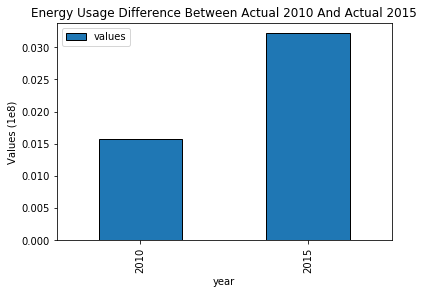

In [231]:
data_2 = pd.DataFrame(data = 
                      {"year" : [2010, 2015], 
                       "values" : [actual_energy_2010/(10**8), actual_energy_2015/(10**8)]})

data_2.plot(kind='bar',x='year', y='values');
plt.title("Energy Usage Difference Between Actual 2010 And Actual 2015")
plt.ylabel('Values (1e8)');


### Cumulative volume change 2010 vs 2015 

#### What is the total amount of water transported in 2010?

In [232]:
print ("The total volume of water transported in 2010: " + str(volume_2010))

The total volume of water transported in 2010: 9280


#### What is the total amount of water transported in 2015?

In [233]:
volume_2015 = 2335 + 8460
print ("The total volume of water transported in 2015: " + str(volume_2015))

The total volume of water transported in 2015: 10795


#### What is the percent increase of cumulative volume of water transported between 2010 and 2015?

In [234]:
difference = volume_2015 - volume_2010
percentage_diff = difference / volume_2010 * 100
print ("The percentage decrease of volume of water transported from 2010 to 2015 : " + str(percentage_dec) + " %")

The percentage decrease of volume of water transported from 2010 to 2015 : 16.325431034482758 %


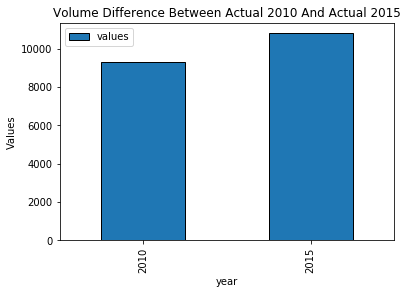

In [235]:
data_3 = pd.DataFrame(data = 
                      {"year" : [2010, 2015], 
                       "values" : [volume_2010, volume_2015]})
data_3.plot(kind='bar',x='year', y='values')
plt.title("Volume Difference Between Actual 2010 And Actual 2015")
plt.ylabel('Values');


# 2015 projection vs 2015 actual

### Amount of energy used in 2015 predicted vs 2015  actual



#### What is the total amount of energy predicted to be used in 2015?

In [236]:
print ("Amount of Energy used in 2015 projection : " + str(projection_energy_2015) + " kwh")

Amount of Energy used in 2015 projection : 2980195.82 kwh


#### What is the total amount of energy used in 2015?

In [237]:
print ("Amount of Energy used in 2015 : " + str(actual_energy_2015) + " kwh")

Amount of Energy used in 2015 : 3216658.2 kwh


#### What is the difference of energy usage between 2015 predicted and 2015 actual?

In [238]:
diff = actual_energy_2015 - projection_energy_2015
print ("The actual energy used in 2015 is " + str(diff) + " kwh" + " greater than the projection made in 2010")

The actual energy used in 2015 is 236462.38000000035 kwh greater than the projection made in 2010


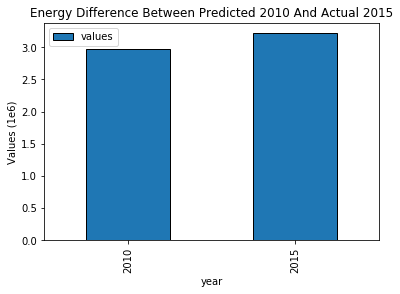

In [239]:
data_4 = pd.DataFrame(data = 
                      {"year" : [2010, 2015], 
                       "values" : [projection_energy_2015/(10**6), actual_energy_2015/(10**6)]})
data_4.plot(kind='bar',x='year', y='values')
plt.title("Energy Difference Between Predicted 2010 And Actual 2015")
plt.ylabel('Values (1e6)');


###  Cumulative volume in 2015 projection vs 2015 actual

#### What is the total amount of water predicted to be transported in 2010?

In [240]:
print ("The projected amount of volume in 2015 : " + str(volume_2015p))

The projected amount of volume in 2015 : 17863


#### What is the total amount of water transported in 2015?

In [241]:
print ("The actual amount of volume in 2015 : " + str(volume_2015))

The actual amount of volume in 2015 : 10795


#### What is the difference of volume of water transported between 2015 predicted and 2015 actual?

In [242]:
diff_v = volume_2015 - volume_2015p
print ("The actual amount of volume used in 2015 is " + str(-diff_v) + " less than the projected amount of volume")

The actual amount of volume used in 2015 is 7068 less than the projected amount of volume


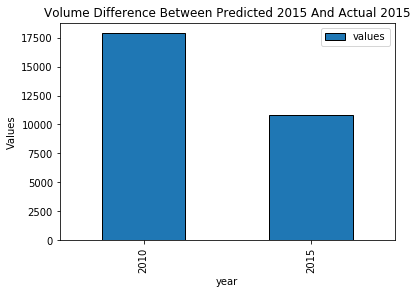

In [243]:
data_5 = pd.DataFrame(data = 
                      {"year" : [2010, 2015], 
                       "values" : [volume_2015p, volume_2015]})
data_5.plot(kind='bar',x='year', y='values')
plt.title("Volume Difference Between Predicted 2015 And Actual 2015")
plt.ylabel('Values');


## Discussion Questions

##### What do you think caused a significant increase of usage of energy between 2010 and 2015?

##### What are the differences you can find between actual 2015 data and predicted 2015 data?

##### Can you connect information found through the energy flow chart and the analysis done with Cerritos Water Utility?

## Can you do your own?

### Let's try to analyze your own utility!

# Analyze data between actual 2010 data and 2015 data predicted in 2010.



### Amount of energy used in 2010 vs 2015 projection

#### What is the total amount of energy used in 2010?

In [71]:
actual_energy_2010 = ...
print ("Amount of Energy used in 2010 : " + str(actual_energy_2010) + " kwh")

#### What is the total amount of energy predicted to be used in 2015?

In [72]:
projection_2015 = ...
print ("Amount of Energy used in 2015 projection : " + str(projection_2015) + " kwh")

#### What is the predicted percent increase of energy used between 2010 and 2015?

In [ ]:
diff_2010 = ...
percent = ...
print ("Transmission energy is expected to increase by " + str(percent) + "%")

### Cumulative volume change 2010 vs 2015 projection


#### What is the total amount of water transported in 2010?

In [ ]:
volume_2010 = ...
print ("Amount of volume used in 2010 : " + str(volume_2010))

#### What is the total amount of water predicted to be transported in 2015?

In [ ]:
volume_2015 = ...
print ("Amount of volume used in 2015 : " + str(volume_2015))

#### What is the predicted percent increase of cumulative volume of water transported between 2010 and 2015?

In [ ]:
percent_v = ...
print ("Volume of water expected to change by " + str(percent_v) + "% from 2010 and 2015")

# Compare actual 2010 data vs actual 2015 data

### Amount of energy used in 2010 vs 2015 



#### What is the total amount of energy used in 2010?

In [ ]:
energy = ...
print ("The total transmission_kwh in 2010 : " + str(energy) + " kwh")

#### What is the total amount of energy used in 2015?

In [ ]:
energy1 = ...
print ("The total transmission_kwh in 2015 : " + str(energy1) + " kwh")

#### What is the percent increase of energy used between 2010 and 2015?

In [ ]:
increase = ...
percentage_inc = ...
print ("The percentage increase of energy from 2010 to 2015 : " + str(percentage_inc) + "%")

### Cumulative volume change 2010 vs 2015 

#### What is the total amount of water transported in 2010?

In [ ]:
volume = ...
print ("The total volume of water transported in 2010: " + str(volume))

#### What is the total amount of water transported in 2015?

In [ ]:
volume1 = ...
print ("The total volume of water transported in 2015: " + str(volume1))

#### What is the percent increase of cumulative volume of water transported between 2010 and 2015?

In [ ]:
decrease = ...
percentage_dec = ...
print ("The percentage decrease of volume of water transported from 2010 to 2015 : " + str(percentage_dec) + " %")

# Compare 2015 projection vs 2015 actual

### Amount of energy used in 2015 predicted vs 2015  actual



#### What is the total amount of energy predicted to be used in 2015?

In [ ]:
projection = ...
print ("Amount of Energy used in 2015 projection : " + str(projection) + " kwh")

#### What is the total amount of energy used in 2015?

In [ ]:
actual = ...
print ("Amount of Energy used in 2015 : " + str(actual) + " kwh")

#### What is the difference of energy usage between 2015 predicted and 2015 actual?

In [ ]:
diff = ...
print ("The actual energy used in 2015 is " + str(diff) + " kwh" + " greater than the projection made in 2010")

###  Cumulative volume in 2015 projection vs 2015 actual

#### What is the total amount of water predicted to be transported in 2010?

In [ ]:
projection_v = ...
print ("The projected amount of volume in 2015 : " + str(projection_v))

#### What is the total amount of water transported in 2015?

In [ ]:
actual_v = ...
print ("The actual amount of volume in 2015 : " + str(actual_v))

#### What is the difference of volume of water transported between 2015 predicted and 2015 actual?

In [ ]:
diff_v = ...
print ("The actual amount of volume used in 2015 is " + str(-diff_v) + " less than the projected amount of volume")

# DONE